### Importing libraries

In [ ]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.applications import VGG16
from sklearn.metrics.pairwise import cosine_similarity
import pickle
import matplotlib.pyplot as plt
from PIL import Image

### Dataset path

In [17]:
dataset_path=r'C:\Users\daniy\Downloads\Dataset'

### Parameters 

In [18]:
img_width, img_height = 224, 224  
channels = 3

### Dataset  information

In [19]:
image_extensions = ('.png', '.jpg', '.jpeg', '.webp','gif')

category_counts = {}

for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    
    if os.path.isdir(category_path):
        image_count = sum(1 for file in os.listdir(category_path) if file.lower().endswith(image_extensions))
        category_counts[category] = image_count

total_images = 0
for category, count in category_counts.items():
    print(f"Category: {category} Images: {count}")
    total_images += count

print(f"Total Images: {total_images}")

Category: bag Images: 1000
Category: cup Images: 950
Category: hat Images: 1000
Category: lamp Images: 1050
Category: Sofa Images: 1000
Category: umbrella Images: 1055
Category: watch Images: 1045
Category: water bottles Images: 900
Total Images: 8000


### Building Model

In [20]:
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(img_width, img_height, channels)
    )
base_model.trainable = False

In [21]:
model = Sequential([
    base_model,
    Flatten()
])

In [22]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

### Extract features from an image

In [23]:
def extract_features(img_path, model):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_width, img_height))
    img_data = tf.keras.preprocessing.image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = tf.keras.applications.vgg16.preprocess_input(img_data)
    features = model.predict(img_data)
    return features.flatten()

### Store extracted features and image paths

In [24]:
features_list = []
image_paths = []
for root, dirs, files in os.walk(dataset_path):
    for img_file in files:
        img_path = os.path.join(root, img_file)
        if img_file.lower().endswith(('.png', '.jpg', '.jpeg','webp')):  
            features = extract_features(img_path, model)
            features_list.append(features)
            image_paths.append(img_path)

features_array = np.array(features_list)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 970ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\daniy\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

### Find similar images

In [25]:
def find_similar_images(input_img_path, features_array, image_paths, model, top_n=6, threshold=0.30):
    input_features = extract_features(input_img_path, model)
    similarities = cosine_similarity([input_features], features_array)[0]
    
    top_indices = np.argsort(similarities)[::-1][:top_n]
    top_similarities = similarities[top_indices]
    
    if top_similarities[0] < threshold:
        print("No similar image found.")
        return []
    
    return [(image_paths[i], similarities[i]) for i in top_indices]

### Function to display the similar images


In [26]:
def show_similar_images(similar_images):
    if not similar_images:
        print("No images to display.")
        return
    
    plt.figure(figsize=(15, 10))
    for i, (img_path, similarity) in enumerate(similar_images):
        img = Image.open(img_path)
        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.title(f"Similarity: {similarity:.4f}")
        plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


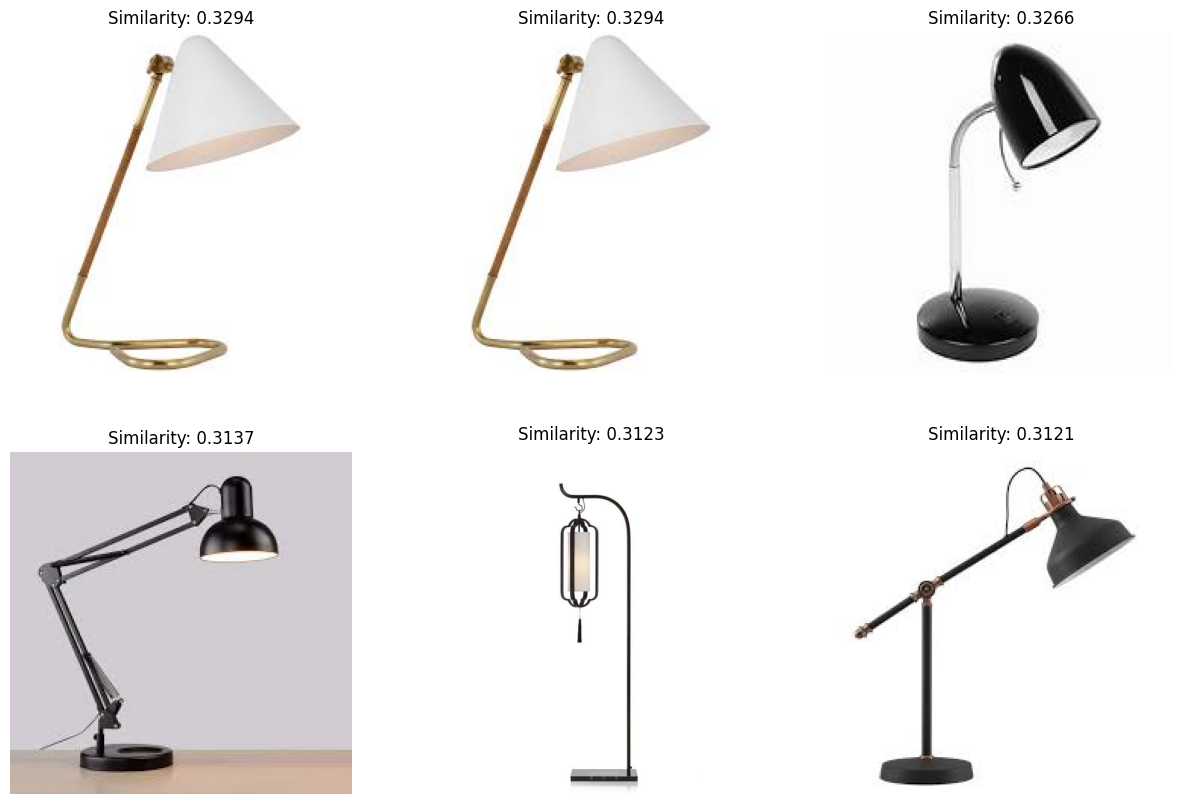

In [27]:
input_image_path = r'D:\FYP\Backened\test\images (1).jpeg'  
similar_images = find_similar_images(input_image_path, features_array, image_paths, model, threshold=0.30)
show_similar_images(similar_images)

### Save trained model


In [28]:
model.save('SBIR_model.keras')

### Loading the saved model

In [29]:
model=tf.keras.models.load_model('SBIR_model.keras')

### Save the extracted features and image paths

In [30]:
with open('features_list.pkl', 'wb') as f:
    pickle.dump(features_list, f)

with open('image_paths.pkl', 'wb') as f:
    pickle.dump(image_paths, f)